#### 正定矩阵

In [1]:
# Bk4_Ch21_01.py

import numpy as np

def is_pos_def(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

A = np.array([[1,0],
              [0,0]])

print(is_pos_def(A))

False


[[x1*(1.5*x1 + 0.5*x2) + x2*(0.5*x1 + 1.5*x2)]]
x1*(1.5*x1 + 0.5*x2) + x2*(0.5*x1 + 1.5*x2)
[3.0*x1 + 1.0*x2, 1.0*x1 + 3.0*x2]


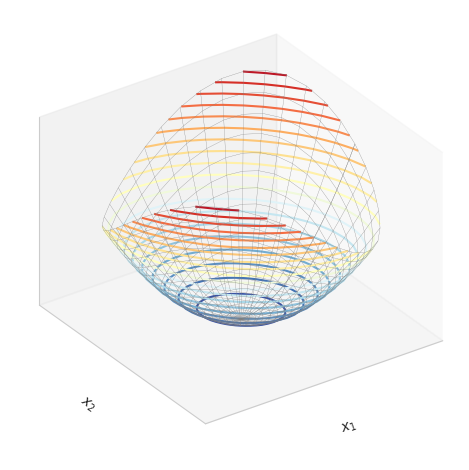

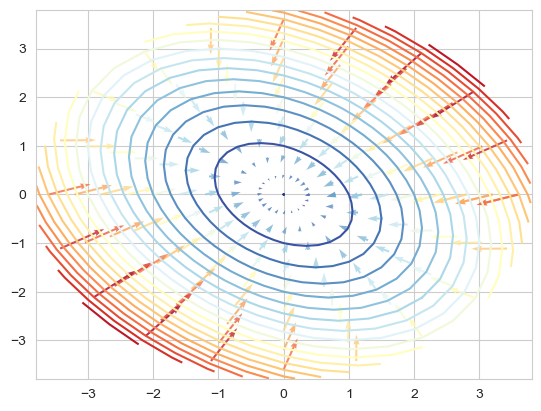

<Figure size 640x480 with 0 Axes>

In [5]:
# Bk4_Ch21_02.py

import sympy
import numpy as np
import matplotlib.pyplot as plt

def mesh_circ(c1, c2, r, num):
    
    theta = np.arange(0,2*np.pi+np.pi/num,np.pi/num)
    r     = np.arange(0,r,r/num)
    theta,r = np.meshgrid(theta,r)
    xx1 = np.cos(theta)*r + c1
    xx2 = np.sin(theta)*r + c2
    
    return xx1, xx2


#define symbolic vars, function
x1,x2 = sympy.symbols('x1 x2')

A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

x = np.array([[x1,x2]]).T

f_x = x.T@A@x
print(f_x)
f_x = f_x[0][0]
print(f_x)

#take the gradient symbolically
grad_f = [sympy.diff(f_x,var) for var in (x1,x2)]
print(grad_f)

# 转换为可调用函数
f_x_fcn = sympy.lambdify([x1,x2],f_x)

#turn into a bivariate lambda for numpy
grad_fcn = sympy.lambdify([x1,x2],grad_f)

# 生成坐标
xx1, xx2 = mesh_circ(0, 0, 4, 20)

# coarse mesh
xx1_, xx2_ = mesh_circ(0, 0, 4, 10)
# 计算梯度
V = grad_fcn(xx1_,xx2_)
V_z = np.ones_like(V[1]);

if isinstance(V[1], int):
    V[1] = np.zeros_like(V[0])

elif isinstance(V[0], int):
    V[0] = np.zeros_like(V[1])

ff_x = f_x_fcn(xx1,xx2)

color_array = np.sqrt(V[0]**2 + V[1]**2)
l_3D_vectors = np.sqrt(V[0]**2 + V[1]**2 + V_z**2)

# 3D visualization
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)
ax.contour3D(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
ax.set_proj_type('ortho')
ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')
plt.tight_layout()

color_array = np.sqrt(V[0]**2 + V[1]**2)

# 2D visualization
fig, ax = plt.subplots()
plt.quiver (xx1_, xx2_, -V[0], -V[1], color_array,
            angles='xy', scale_units='xy',
            edgecolor='none', alpha=0.8,cmap = 'RdYlBu_r')

plt.contour(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')
plt.show()
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.tight_layout()